# Capstone Project - Abrir un nuevo Restaurante (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introducción: Business Problem](#introduction)
* [Datos](#data)
* [Metodología](#methodology)
* [Análisis](#analysis)
* [Resultados](#results)
* [Conclusiones](#conclusion)



## Introducción: Business Problem <a name="introduction"></a>

En el presente proyecto se aplicará la metodología de la Ciencia de Datos, así como las distintas herramientas para el manejo de datos, con la finalidad de resolver la pregunta: **¿Dónde establecer un nuevo restaurante?,** para que sea redituable y tenga éxito.

Cuando un emprendedor decide iniciar un nuevo negocio, uno de los principales problemas con los que se topa, es el decidir **la ubicación para establecer el negocio,** este es un factor determinante en el éxito del mismo, ya que además de la calidad del producto o servicio a ofrecer, es muy importante el lugar donde se establezca, el cual debería ser un lugar visible, con buena afluencia de personas, de fácil acceso, y que tenga poca competencia.   

Por tal motivo, es de suma importancia antes de emprender un negocio identificar el lugar en donde establecerlo, y que cumpla con las características definidas anteriormente; para ello necesitaremos saber entre otros datos:
    
- **El tamaño de la población del lugar**, cuanto mayor sea la población el número de posibles clientes será mayor y la afluencia de gente al negocio será mejor.

- Otro factor importante a tener en cuenta es **la densidad de carreteras**, cuanto mayor sea el flujo de carreteras en el lugar elegido, se tendrá un mejor acceso al negocio, además de que se reducirán los tiempos de traslado de los clientes.
    
- Por último, se deberán **identificar los posibles competidores**, es decir, los resturantes similares al nuestro por lo que se deberá elegir el lugar en donde existan los menos posibles, o no existan restaurantes en la zona. 
    
En el presente proyecto nos enfocaremos en determinar **la mejor ubicación donde establecer un nuevo restaurante de comida tradicional en México, especificamente en la ciudad de Toluca, Estado de México**, y de esta forma, mejorar las expectativas de éxito para el nuevo restaurante.

## Datos <a name="data"></a>

Para obtener la información requerida, de densidad de población y sus características como la población de hombres, población de mujeres y si son económicamente activos; utilizaremos los datos que proporciona el Instituto Nacional de Estadística Geografía e Informática (INEGI), el cual en un organismo gubernamental que recaba la información de todos los habitantes de la República Mexicana, en sus censos de población y vivienda, en específico utilizaremos las bases de datos del censo realizado en el año 2020.

Además, se utilizará el API de Foursquare, la cual es un API que proporciona la información de lugares existentes en una determinada ubicación, para obtener la información de los restaurantes existentes en el municipio de Toluca.

## Metodología <a name="methodology"></a>

Mediante la información proporcionada por el INEGI obtendremos datos como la población total por barrio, el género, la edad, si es económicamente activo, así como nombre del barrio, su latitud y longitud; información que será de utilidad para determinar los índices de población y el índice integral para encontrar el mejor lugar o lugares para establecer el nuevo restaurante.

De esta manera, podremos determinar el número de personas en cada barrio, así como la edad, el género y si se encuentran trabajando, datos importantes para un adecuado análisis y determinar a los posibles clientes.

Por medio del API de Foursquare y las coordenadas proporcionadas por el INEGI, obtendremos la ubicación de los restaurantes ya establecidos en la zona, así como el tipo de restaurantes, sus horarios de operación y hasta los comentarios que tengan para determinar el nivel de competencia, además se podrá visualizar la afluencia de carreteras en el lugar.

Otra forma de obtener las coordenadas geográficas de la ciudad de Toluca y sus barrios es por medio del API de Google (geocoding).

Por último, para determinar el mejor barrio o barrios donde establecer el nuevo restaurante, será calculando un índice integral, por lo que para el presente proyecto utilizaremos el siguiente supuesto: 

Índice integral = índice de población x 0.4 - índice de restaurantes (competidores) x 0.1.

### Recolección de Datos
Iniciaremos con la recolección de datos de la base de datos del Censo 2020 del INEGI, solo obtendremos los datos del Estado de México para posteriormente filtrar la información de los barrios de la ciudad de Toluca.

In [2]:
# Importamos librerias a utilizar
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np
from unicodedata import normalize

import re # Manejo de expresiones regulares
import json # librería para manejar archivos JSON 

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convertir una dirección en valores de latitud y longitud
import requests # librería para manejar solicitudes

from pandas.io.json import json_normalize # librería para convertir un archivo json en un dataframe pandas

# Matplotlib y módulos asociados para graficar
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

mpl.style.use('ggplot') 

# importar k-means desde la fase de agrupación
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # librería para graficar mapas 
from folium import plugins

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.8-main

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2021.5.30          |   py38h578d9bd_0         141 KB  conda-forge
    geographiclib-1.52         |     pyhd8ed1ab_0          35 KB  conda-forge
    geopy-2.2.0                |     pyhd8ed1ab_0          67 KB  conda-forge
    openssl-1.1.1k             |       h7f98852_0         2.1 MB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.52-pyhd8ed1ab_0
  geopy              conda-forge/noarch::geopy-2.2.0-pyhd8ed1ab_0
  pyth

In [75]:
# The code was removed by Watson Studio for sharing.

,cve_entidad,nom_entidad,cve_municipio,nom_municipio,cve_localidad,nom_localidad,Longitud,Latitud,pob_h,pob_m,pob_total,pop12_econ_act,pobf12_econ_act,pobm12_econ_act,tot_viviendas,tot_viv_hab,tam_localidad
0,15,México,106,Toluca,1,Toluca de Lerdo,"99°39'26.340"" W","19°17'36.557"" N",104524,119352,223876,117499,54400,63099,75817,66082,11
1,15,México,106,Toluca,43,Cacalomacán,"99°42'16.517"" W","19°15'11.914"" N",6737,7059,13796,6692,2612,4080,3746,3232,7
2,15,México,106,Toluca,44,Calixtlahuaca,"99°41'07.710"" W","19°20'04.219"" N",4597,4799,9396,4851,2077,2774,2589,2278,6
3,15,México,106,Toluca,46,Capultitlán,"99°39'46.935"" W","19°14'57.062"" N",9950,10753,20703,10524,4661,5863,6771,5567,8
4,15,México,106,Toluca,49,Arroyo Vista Hermosa,"99°33'03.357"" W","19°20'15.353"" N",2278,2443,4721,2191,862,1329,1339,1093,5


In [76]:
# Se filtran las columnas a utilizar 
barrios_df = barrios_df.drop(['cve_entidad', 'nom_entidad'], axis=1)

# Eliminar espacios al inicio y al final de las columnas
barrios_df.columns = barrios_df.columns.str.strip()

# Se renombran algunas columnas
barrios_df.rename(columns={'pob_h':'hombres','pob_m':'mujeres','pobf12_econ_act':'muj12_econ_act','pobm12_econ_act':'hom12_econ_act'}, inplace=True)
barrios_df.head()

,cve_municipio,nom_municipio,cve_localidad,nom_localidad,Longitud,Latitud,hombres,mujeres,pob_total,pop12_econ_act,muj12_econ_act,hom12_econ_act,tot_viviendas,tot_viv_hab,tam_localidad
0,106,Toluca,1,Toluca de Lerdo,"99°39'26.340"" W","19°17'36.557"" N",104524,119352,223876,117499,54400,63099,75817,66082,11
1,106,Toluca,43,Cacalomacán,"99°42'16.517"" W","19°15'11.914"" N",6737,7059,13796,6692,2612,4080,3746,3232,7
2,106,Toluca,44,Calixtlahuaca,"99°41'07.710"" W","19°20'04.219"" N",4597,4799,9396,4851,2077,2774,2589,2278,6
3,106,Toluca,46,Capultitlán,"99°39'46.935"" W","19°14'57.062"" N",9950,10753,20703,10524,4661,5863,6771,5567,8
4,106,Toluca,49,Arroyo Vista Hermosa,"99°33'03.357"" W","19°20'15.353"" N",2278,2443,4721,2191,862,1329,1339,1093,5


## Análisis <a name="analysis"></a>

Para el presente análisis se descartarán los barrios con población menor a 15,000 habitantes, y solo se tomarán en cuenta los barrios con mayor población, tomando como base el tipo de localidad.

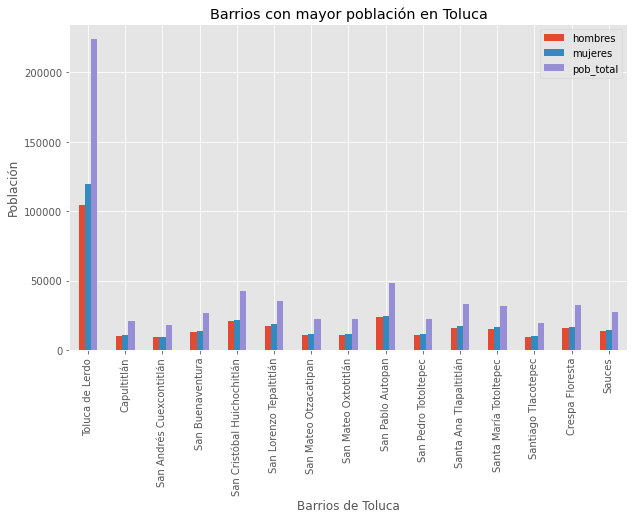

In [77]:
# Visualización de los datos
# Barrios con mayor población en Toluca
barrios_t = barrios_df[barrios_df['tam_localidad']>= 8]
barrios_t = barrios_t[['nom_localidad', 'hombres', 'mujeres', 'pob_total']]
barrios_t.set_index('nom_localidad', inplace=True)
barrios_t.plot(kind='bar', figsize=(10, 6), rot=90) 
plt.xlabel('Barrios de Toluca')
plt.ylabel('Población')
plt.title('Barrios con mayor población en Toluca')
plt.show()

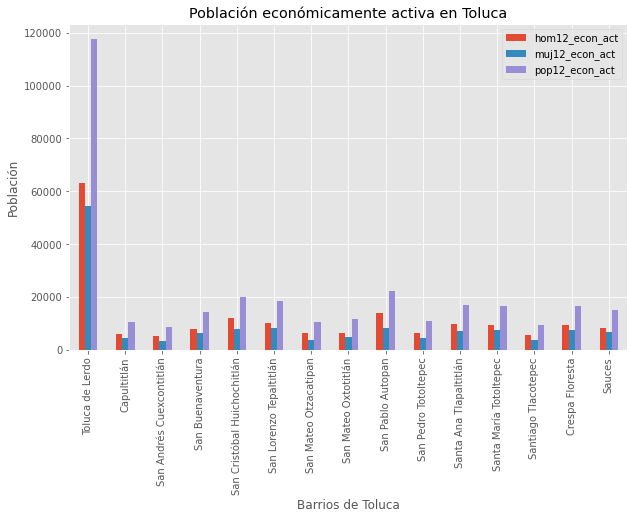

In [78]:
# Población economicamente activa
barrios_e = barrios_df[barrios_df['tam_localidad']>= 8]
barrios_e = barrios_e[['nom_localidad', 'hom12_econ_act', 'muj12_econ_act', 'pop12_econ_act']]
barrios_e.set_index('nom_localidad', inplace=True)
barrios_e.plot(kind='bar', figsize=(10, 6), rot=90) 
plt.xlabel('Barrios de Toluca')
plt.ylabel('Población')
plt.title('Población económicamente activa en Toluca')
plt.show()

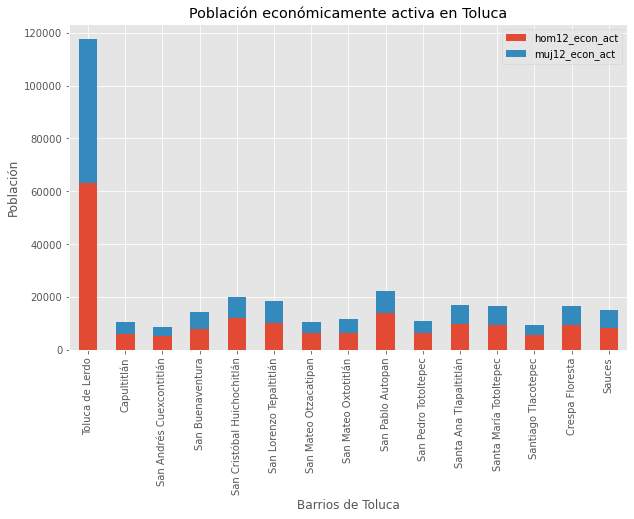

In [79]:
# Población economicamente activa
barrios_e = barrios_df[barrios_df['tam_localidad']>= 8]
barrios_e = barrios_e[['nom_localidad', 'hom12_econ_act', 'muj12_econ_act']]
barrios_e.set_index('nom_localidad', inplace=True)
barrios_e.plot(kind='bar', stacked = 'True', figsize=(10, 6), rot=90) 
plt.xlabel('Barrios de Toluca')
plt.ylabel('Población')
plt.title('Población económicamente activa en Toluca')
plt.show()

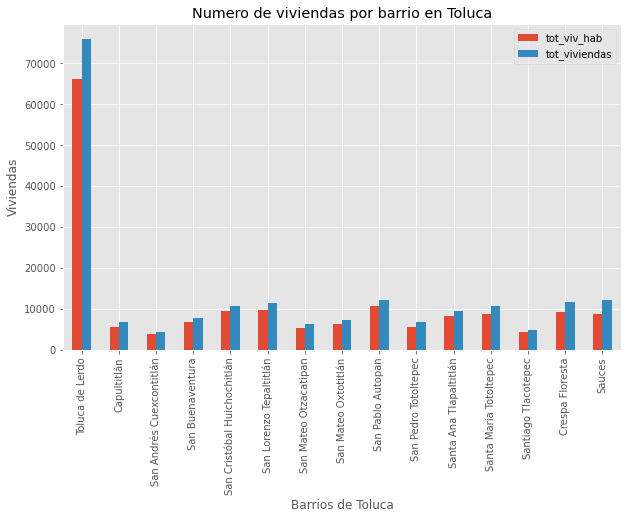

In [80]:
# Numero de viviendas por barrio
barrios_v = barrios_df[barrios_df['tam_localidad']>= 8]
barrios_v = barrios_v[['nom_localidad', 'tot_viv_hab', 'tot_viviendas']]
barrios_v.set_index('nom_localidad', inplace=True)
barrios_v.plot(kind='bar', figsize=(10, 6), rot=90)

plt.ylabel('Viviendas')
plt.xlabel('Barrios de Toluca')
plt.title('Numero de viviendas por barrio en Toluca')
plt.show()

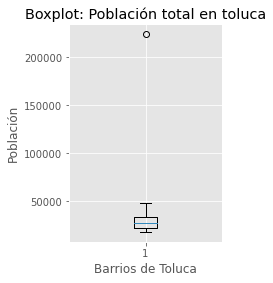

In [81]:
# Diagrama de caja para observar valores extraños
plt.subplot(1,2,2)
plt.title('Boxplot: Población total en toluca')
POB=plt.boxplot(barrios_t['pob_total'] )
plt.ylabel('Población')
plt.xlabel('Barrios de Toluca')
plt.show()
# Toluca destaca con la mayor población

In [82]:
# Convertir coordenadas geograficas a decimales
barrios_df = barrios_df.assign(latitude =99.9999999)
barrios_df = barrios_df.assign(longitude=99.9999999)

# Función para transformar coordenadas geograficas a decimales
def dms2dd(degrees, minutes, seconds, direction):
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    if direction == 'E' or direction == 'W':
        dd *= -1
    return dd;

def parse_dms(dms):
    parts = re.split('[^\d\.\w]+', dms)
    lat = dms2dd(parts[0], parts[1], parts[2], parts[3])

    return (lat)

cont = 0
for adress, lat, long in zip(barrios_df['nom_localidad'],barrios_df['Latitud'], barrios_df['Longitud']):
    long = long.strip()
    barrios_df['latitude'].loc[cont] = parse_dms(lat)
    barrios_df['longitude'].loc[cont] =  parse_dms(long)
    cont = cont+1
barrios_df.head()

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,cve_municipio,nom_municipio,cve_localidad,nom_localidad,Longitud,Latitud,hombres,mujeres,pob_total,pop12_econ_act,muj12_econ_act,hom12_econ_act,tot_viviendas,tot_viv_hab,tam_localidad,latitude,longitude
0,106,Toluca,1,Toluca de Lerdo,"99°39'26.340"" W","19°17'36.557"" N",104524,119352,223876,117499,54400,63099,75817,66082,11,19.293488,-99.657317
1,106,Toluca,43,Cacalomacán,"99°42'16.517"" W","19°15'11.914"" N",6737,7059,13796,6692,2612,4080,3746,3232,7,19.253309,-99.704588
2,106,Toluca,44,Calixtlahuaca,"99°41'07.710"" W","19°20'04.219"" N",4597,4799,9396,4851,2077,2774,2589,2278,6,19.334505,-99.685475
3,106,Toluca,46,Capultitlán,"99°39'46.935"" W","19°14'57.062"" N",9950,10753,20703,10524,4661,5863,6771,5567,8,19.249184,-99.663038
4,106,Toluca,49,Arroyo Vista Hermosa,"99°33'03.357"" W","19°20'15.353"" N",2278,2443,4721,2191,862,1329,1339,1093,5,19.337598,-99.550933


In [83]:
# Se obtienen las coordenadas de Toluca para dibujar el mapa
address = 'Toluca de Lerdo, Estado de México'
geolocator = Nominatim(user_agent="tr_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toluca City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toluca City are 19.292545, -99.6569007.


In [84]:
# Se crea el mapa de Toluca utilizando los valores de latitud y longitud
map_toluca = folium.Map(location=[latitude, longitude], zoom_start=12)

# añadir marcadores de los barrios
for lat, lng, borough, neighborhood in zip(barrios_df['latitude'], barrios_df['longitude'], barrios_df['nom_municipio'], barrios_df['nom_localidad']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toluca) 
    
map_toluca  

In [85]:
# Exploración y Agrupación de barrios
# Se define la versión y credenciales de foursquare
CLIENT_ID = '4LXLGKUIQ21NXIKQ5OVPG41W4TBMR5LRLXZ3DJTTBZBK13XU' # su ID de Foursquare
CLIENT_SECRET = 'QVIJKSK23RPS5PE0CR1SKHSDSRM2SFA2XVK3GACPQICCROL4' # Secreto de Foursquare
VERSION = '20180605' # versión de la API de Foursquare
LIMIT = 100 # Un valor límite para la API de Foursquare

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4LXLGKUIQ21NXIKQ5OVPG41W4TBMR5LRLXZ3DJTTBZBK13XU
CLIENT_SECRET:QVIJKSK23RPS5PE0CR1SKHSDSRM2SFA2XVK3GACPQICCROL4


In [86]:
# función para explorar todos los barrios
LIMIT = 100 # limit of number of venues returned by Foursquare API
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # crear la URL de solicitud de API
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # solicitud GET
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # regresa solo información relevante de cada sitio cercano
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [97]:
# Se filtran los barrios y solo tomaremos en cuenta los barrios con 15,000 o más habitantes
barrios_fil = barrios_df[barrios_df['tam_localidad']>= 8]
barrios_fil = barrios_fil[['nom_localidad', 'latitude', 'longitude', 'pob_total', 'tam_localidad']]
barrios_fil.reset_index(drop = True, inplace = True)

# Se obtiene el índice de población
barrios_fil['indice_pob'] = barrios_fil['pob_total'] / barrios_fil['pob_total'].sum()
barrios_fil

,nom_localidad,latitude,longitude,pob_total,tam_localidad,indice_pob
0,Toluca de Lerdo,19.293488,-99.657317,223876,11,0.356959
1,Capultitlán,19.249184,-99.663038,20703,8,0.033010
2,San Andrés Cuexcontitlán,19.355780,-99.625639,18180,8,0.028987
3,San Buenaventura,19.267702,-99.692161,26968,8,0.042999
4,San Cristóbal Huichochitlán,19.336907,-99.636576,42320,9,0.067477
5,San Lorenzo Tepaltitlán,19.312778,-99.624347,35292,9,0.056271
6,San Mateo Otzacatipan,19.326717,-99.605106,22574,8,0.035993
7,San Mateo Oxtotitlán,19.292521,-99.686870,22500,8,0.035875
8,San Pablo Autopan,19.357432,-99.657216,47932,9,0.076425
9,San Pedro Totoltepec,19.312412,-99.572497,22374,8,0.035674


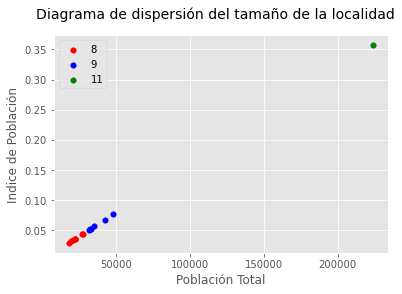

In [98]:
# Gráfico de Dispersión del tamaño del barrio
colors1 ={8:'red',9:'Blue',11:'Green'}
fig, ax = plt.subplots()
for tam in set(barrios_fil.tam_localidad):
    ax.scatter(
        barrios_fil.pob_total[barrios_fil.tam_localidad == tam],
        barrios_fil.indice_pob[barrios_fil.tam_localidad == tam],
        s = 30,
        c = colors1[tam],
        label = tam
    )
    
plt.legend()
plt.suptitle('Diagrama de dispersión del tamaño de la localidad', fontsize = 14)
ax.set_xlabel('Población Total')
ax.set_ylabel('Indice de Población')
plt.show()

In [99]:
# Se obtiene la información de los 15 barrios con mayor índice de población
toluca_venues = getNearbyVenues(names=barrios_fil['nom_localidad'],
                                   latitudes=barrios_fil['latitude'],
                                   longitudes=barrios_fil['longitude']
                                  )

Toluca de Lerdo
Capultitlán
San Andrés Cuexcontitlán
San Buenaventura
San Cristóbal Huichochitlán
San Lorenzo Tepaltitlán
San Mateo Otzacatipan
San Mateo Oxtotitlán
San Pablo Autopan
San Pedro Totoltepec
Santa Ana Tlapaltitlán
Santa María Totoltepec
Santiago Tlacotepec
Crespa Floresta
Sauces


In [100]:
# Tamaño del dataframe y numero de sitios por cada vecindario
print(toluca_venues.shape)
toluca_venues.groupby('Neighborhood').count()

(145, 7)


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Capultitlán,8,8,8,8,8,8
Crespa Floresta,4,4,4,4,4,4
San Andrés Cuexcontitlán,2,2,2,2,2,2
San Buenaventura,8,8,8,8,8,8
San Cristóbal Huichochitlán,5,5,5,5,5,5
San Lorenzo Tepaltitlán,15,15,15,15,15,15
San Mateo Otzacatipan,4,4,4,4,4,4
San Mateo Oxtotitlán,5,5,5,5,5,5
San Pablo Autopan,4,4,4,4,4,4


In [101]:
# Se renombran las columnas
toluca_venues.rename(columns={'Venue Latitude':'ven_latitude','Venue Longitude':'ven_longitude','Venue Category':'ven_category'}, inplace=True)

# Se obtienen solo los lugares de comida
toluca_ven_res = toluca_venues.iloc[np.where(toluca_venues.ven_category.str.contains("Restaurant") | (toluca_venues.ven_category.str.contains("Chicken")) |
                                            (toluca_venues.ven_category.str.contains("Steak")) | (toluca_venues.ven_category.str.contains("Food")) |
                                            (toluca_venues.ven_category.str.contains("Bistro")) | (toluca_venues.ven_category.str.contains("Taco")) |
                                             (toluca_venues.ven_category.str.contains("BBQ")) | (toluca_venues.ven_category.str.contains("Breakfast"))
                                            )]
toluca_ven_res.reset_index(drop = True, inplace = True)
toluca_ven_res 

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,ven_latitude,ven_longitude,ven_category
0,Toluca de Lerdo,19.293488,-99.657317,Tortas El Torito Enano,19.292500,-99.656037,Fast Food Restaurant
1,Toluca de Lerdo,19.293488,-99.657317,Bistró Mecha Centro Histórico,19.290751,-99.654963,Bistro
2,Toluca de Lerdo,19.293488,-99.657317,Los Rancheros Del Sur,19.291789,-99.659255,Mexican Restaurant
3,Toluca de Lerdo,19.293488,-99.657317,Restaurante Biarritz,19.290825,-99.658276,Breakfast Spot
4,Toluca de Lerdo,19.293488,-99.657317,La Botticella,19.294278,-99.654998,Italian Restaurant
5,Toluca de Lerdo,19.293488,-99.657317,Sushí Haíkú,19.291083,-99.655110,Japanese Restaurant
6,Toluca de Lerdo,19.293488,-99.657317,Tortería La Barca,19.291296,-99.657832,Mexican Restaurant
7,Toluca de Lerdo,19.293488,-99.657317,Cafe Con Leche Independencia,19.292009,-99.654728,Restaurant
8,Toluca de Lerdo,19.293488,-99.657317,Sushi Haiku,19.291070,-99.655210,Sushi Restaurant
9,Toluca de Lerdo,19.293488,-99.657317,Escamilla,19.293652,-99.653208,Seafood Restaurant


In [102]:
# Se crea el mapa de Toluca con los barrios de 15000 o más habitantes, utilizando los valores de latitud y longitud
map_toluca = folium.Map(location=[latitude, longitude], zoom_start=12)

# añadir marcadores de los barrios
for lat, lng, neighborhood in zip(barrios_fil['latitude'], barrios_fil['longitude'], barrios_fil['nom_localidad']):
    label = '{}.'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toluca) 
    
map_toluca  

In [103]:
# Se obtiene el nuevo tamaño del dataframe y numero de lugares de comida, solo de los barrios con 15,000 habitantes o más
print(toluca_ven_res.shape)
toluca_ven_res.groupby('Neighborhood').count()

(55, 7)


,Neighborhood Latitude,Neighborhood Longitude,Venue,ven_latitude,ven_longitude,ven_category
Neighborhood,,,,,,
Capultitlán,2,2,2,2,2,2
Crespa Floresta,1,1,1,1,1,1
San Buenaventura,4,4,4,4,4,4
San Cristóbal Huichochitlán,2,2,2,2,2,2
San Lorenzo Tepaltitlán,9,9,9,9,9,9
San Mateo Oxtotitlán,2,2,2,2,2,2
San Pedro Totoltepec,4,4,4,4,4,4
Santa Ana Tlapaltitlán,3,3,3,3,3,3
Santa María Totoltepec,2,2,2,2,2,2


In [104]:
# Se agrupan los resultados por barrio
tol_ven_gra=toluca_ven_res[["Neighborhood", "Venue"]]
tol_ven_gra=tol_ven_gra.rename(columns={"Neighborhood": "Neighbourhood", "Venue": "Venue Response"})
tol_ven_gra =tol_ven_gra.groupby('Neighbourhood').count()
tol_ven_gra

,Venue Response
Neighbourhood,
Capultitlán,2
Crespa Floresta,1
San Buenaventura,4
San Cristóbal Huichochitlán,2
San Lorenzo Tepaltitlán,9
San Mateo Oxtotitlán,2
San Pedro Totoltepec,4
Santa Ana Tlapaltitlán,3
Santa María Totoltepec,2


Distribution of Neighbourhoods into Bins:  [6 3 1 0 1 0 0 0 0 1]
The ranges of the Bins:  [ 1.   2.8  4.6  6.4  8.2 10.  11.8 13.6 15.4 17.2 19. ]


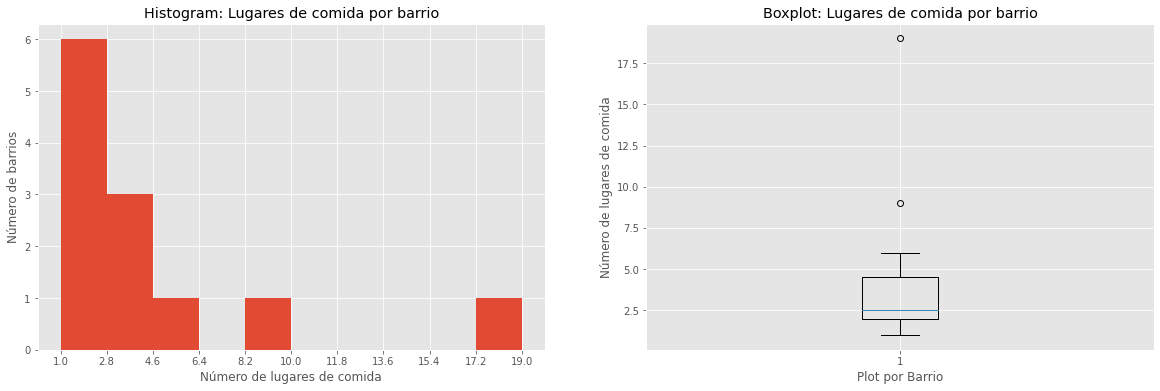

In [105]:
#Se genera un histograma y un diagrama de caja para visualizar los resultados de foursquare
# Use np.histogram method to generate 10 bins out of the data
bin_count=10
count, bin_edges = np.histogram(tol_ven_gra['Venue Response'], bins=bin_count)

print("Distribution of Neighbourhoods into Bins: ", count) # frequency count
print("The ranges of the Bins: ", bin_edges) # bin ranges, default = 10 bins

# Prepare for 2 Subplots Space: Histogram and Boxplot
plt.figure(figsize=(20, 6))

# Create a Histogram
plt.subplot(1,2,1)

# to divide data into 10 bins
count, bin_edges = np.histogram(tol_ven_gra['Venue Response'] , bins=bin_count)
plt.title('Histogram: Lugares de comida por barrio')

plt.hist(tol_ven_gra['Venue Response'] )
plt.xticks(bin_edges)
plt.ylabel('Número de barrios')
plt.xlabel('Número de lugares de comida')

plt.subplot(1,2,2)
plt.title('Boxplot: Lugares de comida por barrio')
CSS=plt.boxplot(tol_ven_gra['Venue Response'])
plt.ylabel('Número de lugares de comida')
plt.xlabel('Plot por Barrio')
plt.savefig('Foursquare.jpg')

In [106]:
# añadir marcadores con los lugares de comida, al mapa de toluca 
for lat, lng, venue in zip(toluca_ven_res['ven_latitude'], toluca_ven_res['ven_longitude'], toluca_ven_res['Venue']):
    label = '{}.'.format(venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.6,
        parse_html=False).add_to(map_toluca) 
    
map_toluca  

In [107]:
# Se agrega el total de lugares de comida al dataframe original
df_dummy1 = toluca_ven_res.groupby('Neighborhood').count()
barrios_fil = pd.merge(barrios_fil, df_dummy1['Venue'], left_on='nom_localidad', right_on='Neighborhood', how = 'left')
barrios_fil = barrios_fil.fillna(0)
barrios_fil['Venue'] = barrios_fil['Venue'].astype(int)
barrios_fil

,nom_localidad,latitude,longitude,pob_total,tam_localidad,indice_pob,Venue
0,Toluca de Lerdo,19.293488,-99.657317,223876,11,0.356959,19
1,Capultitlán,19.249184,-99.663038,20703,8,0.033010,2
2,San Andrés Cuexcontitlán,19.355780,-99.625639,18180,8,0.028987,0
3,San Buenaventura,19.267702,-99.692161,26968,8,0.042999,4
4,San Cristóbal Huichochitlán,19.336907,-99.636576,42320,9,0.067477,2
5,San Lorenzo Tepaltitlán,19.312778,-99.624347,35292,9,0.056271,9
6,San Mateo Otzacatipan,19.326717,-99.605106,22574,8,0.035993,0
7,San Mateo Oxtotitlán,19.292521,-99.686870,22500,8,0.035875,2
8,San Pablo Autopan,19.357432,-99.657216,47932,9,0.076425,0
9,San Pedro Totoltepec,19.312412,-99.572497,22374,8,0.035674,4


In [108]:
# Se agrega un índice de lugares
barrios_fil['indice_venue'] = barrios_fil['Venue'] / barrios_fil['Venue'].sum()

# Se cálcula el índice integral con el siguiente supuesto: Índice integral = índice de población x0.4 - índice de productos competidores similares x0.1
barrios_fil['indice_integral'] = (barrios_fil['indice_pob'] * 0.4) - (barrios_fil['indice_venue'].fillna(0) * 0.1)
barrios_fil

,nom_localidad,latitude,longitude,pob_total,tam_localidad,indice_pob,Venue,indice_venue,indice_integral
0,Toluca de Lerdo,19.293488,-99.657317,223876,11,0.356959,19,0.345455,0.108238
1,Capultitlán,19.249184,-99.663038,20703,8,0.033010,2,0.036364,0.009568
2,San Andrés Cuexcontitlán,19.355780,-99.625639,18180,8,0.028987,0,0.000000,0.011595
3,San Buenaventura,19.267702,-99.692161,26968,8,0.042999,4,0.072727,0.009927
4,San Cristóbal Huichochitlán,19.336907,-99.636576,42320,9,0.067477,2,0.036364,0.023354
5,San Lorenzo Tepaltitlán,19.312778,-99.624347,35292,9,0.056271,9,0.163636,0.006145
6,San Mateo Otzacatipan,19.326717,-99.605106,22574,8,0.035993,0,0.000000,0.014397
7,San Mateo Oxtotitlán,19.292521,-99.686870,22500,8,0.035875,2,0.036364,0.010714
8,San Pablo Autopan,19.357432,-99.657216,47932,9,0.076425,0,0.000000,0.030570
9,San Pedro Totoltepec,19.312412,-99.572497,22374,8,0.035674,4,0.072727,0.006997


In [109]:
# Por medio de K-means se realiza la agrupación de barrios en 4 categorias
kclusters = 4

toluca_cluster = barrios_fil[['indice_integral']]

# ejecutar k-means
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toluca_cluster)

# revisar las etiquetas de las agrupaciones generadas para cada fila del dataframe
kmeans.labels_[0:10] 

# Se crea un nuevo dataframe que incluya la agrupación
# añadir etiquetas
barrios_fil.insert( 1,'Cluster Labels', kmeans.labels_)
barrios_fil

,nom_localidad,Cluster Labels,latitude,longitude,pob_total,tam_localidad,indice_pob,Venue,indice_venue,indice_integral
0,Toluca de Lerdo,1,19.293488,-99.657317,223876,11,0.356959,19,0.345455,0.108238
1,Capultitlán,0,19.249184,-99.663038,20703,8,0.033010,2,0.036364,0.009568
2,San Andrés Cuexcontitlán,0,19.355780,-99.625639,18180,8,0.028987,0,0.000000,0.011595
3,San Buenaventura,0,19.267702,-99.692161,26968,8,0.042999,4,0.072727,0.009927
4,San Cristóbal Huichochitlán,2,19.336907,-99.636576,42320,9,0.067477,2,0.036364,0.023354
5,San Lorenzo Tepaltitlán,0,19.312778,-99.624347,35292,9,0.056271,9,0.163636,0.006145
6,San Mateo Otzacatipan,3,19.326717,-99.605106,22574,8,0.035993,0,0.000000,0.014397
7,San Mateo Oxtotitlán,0,19.292521,-99.686870,22500,8,0.035875,2,0.036364,0.010714
8,San Pablo Autopan,2,19.357432,-99.657216,47932,9,0.076425,0,0.000000,0.030570
9,San Pedro Totoltepec,0,19.312412,-99.572497,22374,8,0.035674,4,0.072727,0.006997


In [110]:
# Se ordenan los barrios de acuerdo al indice integral de forma descendente
barrios_fil_ord = barrios_fil.sort_values('indice_integral', ascending=False)
barrios_fil_ord.reset_index(drop=True)

,nom_localidad,Cluster Labels,latitude,longitude,pob_total,tam_localidad,indice_pob,Venue,indice_venue,indice_integral
0,Toluca de Lerdo,1,19.293488,-99.657317,223876,11,0.356959,19,0.345455,0.108238
1,San Pablo Autopan,2,19.357432,-99.657216,47932,9,0.076425,0,0.000000,0.030570
2,San Cristóbal Huichochitlán,2,19.336907,-99.636576,42320,9,0.067477,2,0.036364,0.023354
3,Crespa Floresta,3,19.313538,-99.594541,32307,9,0.051512,1,0.018182,0.018787
4,Santa María Totoltepec,3,19.301545,-99.585860,31689,9,0.050526,2,0.036364,0.016574
5,Santa Ana Tlapaltitlán,3,19.279259,-99.627182,33089,9,0.052759,3,0.054545,0.015649
6,San Mateo Otzacatipan,3,19.326717,-99.605106,22574,8,0.035993,0,0.000000,0.014397
7,San Andrés Cuexcontitlán,0,19.355780,-99.625639,18180,8,0.028987,0,0.000000,0.011595
8,Santiago Tlacotepec,0,19.223879,-99.670501,19744,8,0.031481,1,0.018182,0.010774
9,San Mateo Oxtotitlán,0,19.292521,-99.686870,22500,8,0.035875,2,0.036364,0.010714


### Resultados <a name="results"></a>

Como se mencionó anteriormente, para la elección del mejor lugar (barrio) para establecer un nuevo restaurante de comida mexicana, se realiza en base al barrio con el mejor índice integral, el cual se determinó con la fórmula: indice_población * 0.4 - indice_lugares * 0.1.

De acuerdo a los resultados obtenidos, se observa que los barrios con un mejor índice integral, son aquellos con una población del tipo 8, 9 y 11, donde:
-	Tipo 8  -> 15,000 a 29,999 habitantes, 
-	Tipo 9  -> 30,000 a 49,999 habitantes,
-	Tipo 10-> 50,000 a 99,999 habitantes,
-	Tipo 11-> 100,000 a 249,999 habitantes 

Y los barrios con un menor número de lugares de comida, a excepción del barrio de Toluca de Lerdo, el cual es un barrio atípico ya que cuenta con el mayor número de habitantes (223,876) y posee 19 lugares de comida.
Para visualizar de una mejor manera los resultados, se agruparon los barrios en 4 grupos, siendo los barrios con un mejor índice integral los que se encuentran dentro de los grupos 1,2 y 3; en ese orden de importancia.


In [114]:
df_pob = barrios_fil[['nom_localidad','Cluster Labels', 'indice_integral']]
df_pob = df_pob.sort_values('indice_integral', ascending=False)
df_pob

,nom_localidad,Cluster Labels,indice_integral
0,Toluca de Lerdo,1,0.108238
8,San Pablo Autopan,2,0.030570
4,San Cristóbal Huichochitlán,2,0.023354
13,Crespa Floresta,3,0.018787
11,Santa María Totoltepec,3,0.016574
10,Santa Ana Tlapaltitlán,3,0.015649
6,San Mateo Otzacatipan,3,0.014397
2,San Andrés Cuexcontitlán,0,0.011595
12,Santiago Tlacotepec,0,0.010774
7,San Mateo Oxtotitlán,0,0.010714


En el siguiente mapa Cloroplético se observan los resultados deacuerdo a la población total por barrio:

In [ ]:
# Se carga el archivo geojson de los barrios de toluca
streaming_body_1 = client_cacb331a3a4f4c23a1c49682859c8ea3.get_object(Bucket='proyectofinalcursocapstone-donotdelete-pr-dlxovizxekws8i', Key='map.geojson')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(streaming_body_1, "__iter__"): streaming_body_1.__iter__ = types.MethodType( __iter__, streaming_body_1 ) 

toluca_geo = json.load(streaming_body_1)    

In [115]:
# Se crea un mapa Cloroplético con los barrios de toluca
map_toluca2 = folium.Map(location=[latitude, longitude], zoom_start=12)

# cree una matriz de NumPy con un largo de 6 y con un espaciado lineal a partir del total mínimo de población hasta el total máximo de población
threshold_scale = np.linspace(barrios_fil['pob_total'].min(),
                              barrios_fil['pob_total'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # cambie la matriz de NumPy a una lista
threshold_scale[-1] = threshold_scale[-1] + 1 # asegúrese de que el último valor de la lista sea mayor que la población máxima

# genere un mapa coroplético con la población total de cada barrio
map_toluca2.choropleth(
    geo_data=toluca_geo,
    data=barrios_fil,
    columns=['nom_localidad','pob_total'],
    key_on='feature.properties.nom_localidad',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.8,
    line_color = 'Blue',
    legend_name='Barrios de Toluca',
    reset = True
)

# muestre el mapa
map_toluca2

En el siguiente mapa se nuestran por color las agrupaciones de barrios, siendo los mejores barrios: 
- Morado-> Cluster 1 (Toluca)
- Azul  -> Cluster 2 (San Pablo Autopan, San Cristóbal Huichochitlán)
- Verde -> Cluster 3 (San Mateo Otzacatipan, Santa Ana Tlapaltitlán, Santa María Totoltepec, Crespa Floresta)

In [116]:
# Se crear mapa con las agrupaciónes realizadas
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# establecer el esquema de color para las agrupaciones
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# añadir marcadores al mapa
markers_colors = []
for lat, lon, poi, cluster in zip(barrios_fil['latitude'], barrios_fil['longitude'], barrios_fil['nom_localidad'], barrios_fil['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

De acuerdo al análisis resalizado previamente se determina que los mejores barrios para establecer un nuevo restaurante de comida mexicana, son los clasificados en los grupos 1 y 2 con el mejores indice integral.

Por lo que se concluye que los mejores barrios para establecer un nuevo restaurante de comida mexicana son:

In [126]:
df_res = df_pob[df_pob['Cluster Labels'].isin([1,2])]
df_res.reset_index(drop=True)

,nom_localidad,Cluster Labels,indice_integral
0,Toluca de Lerdo,1,0.108238
1,San Pablo Autopan,2,0.030570
2,San Cristóbal Huichochitlán,2,0.023354


En el siguiente mapa se muestran los barrios agrupados, con los lugares de comida de cada uno de los barrios, al dar clic en las agrupaciones estas se subdividen hasta mostrar los lugares de comida en la ubicación exacta dentro del barrio.

In [128]:
# Y finalmente creamos un mapa de toluca con los lugares de comida agrupados por barrio
# comencemos nuevamente con una copia limpia del mapa 
toluca_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instancie un objeto de grupo de marcas para los lugares de comida en el DataFrame
rest = plugins.MarkerCluster().add_to(toluca_map)

# añadir marcadores con los lugares de comida, al mapa de toluca 
for lat, lng, venue in zip(toluca_ven_res['ven_latitude'], toluca_ven_res['ven_longitude'], toluca_ven_res['Venue']):
    label = '{}.'.format(venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.6,
        parse_html=False).add_to(rest) 

# muestre el mapa
toluca_map    

## Conclusiones  <a name="conclusion"></a>

Con base en el desarrollo del presente proyecto Capstone para determinar el mejor lugar para establecer un nuevo restaurante de comida mexicana en la ciudad de Toluca, he aprendido a utilizar las herramientas que proporciona la Ciencia de Datos para facilitar el ciclo de vida de todo el proyecto.

Herramientas como los dataframes de pandas, las gráficas e histogramas de matplotlib o los mapas de folium, aunado a API´s de terceros como Foursquare, la cual es una poderosa herramienta en proyectos donde se deba trabajar con mapas de todo tipo ya que proporciona información valiosa de los lugares de todo el mundo.

Además, por medio de la librería de pandas de Python se explotó la información del INEGI, de donde se obtuvo la población residente en los barrios de la ciudad de Toluca, el género y si es económicamente activa; así como la latitud y longitud de los barrios, información útil al momento de la creación de mapas de folium y de la obtención de lugares de comida a partir del API de Foursqure.

Por lo que, puedo concluir que hoy en día el manejo de herramientas de Ciencia de Datos es indispensable en el desarrollo de cualquier proyecto, para facilitar la recolección, limpieza análisis y visualización de los datos, así como la obtención de resultados y la publicación de los mismos.